In [13]:
!pip install 'fhnw-nlp-utils>=0.1.3'
!pip install pyarrow fastparquet fasttext 
from fhnw.nlp.utils.storage import load_dataframe
from fhnw.nlp.utils.storage import download
from fhnw.nlp.utils.colab import runs_on_colab

import numpy as np
import pandas as pd

import tensorflow as tf

print("Tensorflow version:", tf.__version__)

#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Tensorflow version: 2.5.1
GPU is available


In [14]:
file = "data/german_news_articles_original_train_and_test_tokenized.parq"
data_all = load_dataframe(file)

In [3]:
data_all.head()

,text_original,label,split,text_clean,token_clean,token_lemma,token_stem,token_clean_stopwords
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport,train,Jähriger fällt wohl bis Saisonende aus Wien R...,"[jähriger, fällt, wohl, saisonende, wien, rapi...","[jähriger, fällen, wohl, saisonende, wien, rap...","[jahrig, fallt, wohl, saison, wien, rapid, woh...","[jähriger, fällt, wohl, saisonende, wien, rapi..."
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur,train,Erfundene Bilder zu Filmen die als verloren ge...,"[erfundene, bilder, filmen, verloren, gelten, ...","[erfundene, bild, film, verlieren, gelten, the...","[erfund, bild, film, verlor, gelt, the, forbid...","[erfundene, bilder, filmen, verloren, gelten, ..."
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web,train,Der frischgekürte CEO Sundar Pichai setzt auf ...,"[frischgekürte, ceo, sundar, pichai, setzt, um...","[frischgekürte, ceo, sundar, pichai, setzen, u...","[frischgekurt, ceo, sundar, pichai, setzt, umg...","[frischgekürte, ceo, sundar, pichai, setzt, um..."
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft,train,Putin Einigung dass wir Menge auf Niveau von J...,"[putin, einigung, menge, niveau, jänner, halte...","[putin, einigung, menge, niveau, jänner, halte...","[putin, einig, meng, niveau, jann, halt, moska...","[putin, einigung, menge, niveau, jänner, halte..."
4,Estland sieht den künftigen österreichischen P...,Inland,train,Estland sieht den künftigen österreichischen P...,"[estland, sieht, künftigen, österreichischen, ...","[estland, sehen, künftig, österreichisch, präs...","[estland, sieht, kunftig, osterreich, prasiden...","[estland, sieht, künftigen, österreichischen, ..."


In [15]:
from fhnw.nlp.utils.params import get_train_test_split, extract_vocabulary_and_set,create_label_binarizer_and_set, extract_text_vectorization_and_set

In [48]:
params = {
    "verbose": True,
    "shuffle": True,
    "batch_size": 64,
    "X_column_name": "text_clean",
    "y_column_name": "label",
    "embedding_type": "fasttext",
    #"embedding_type": "bytepair",
    "embedding_dim": 300,
    "embedding_mask_zero": True,
    "embedding_trainable": False,
    #"embedding_input_sequence_length": output_sequence_length if 'output_sequence_length' in locals() or 'output_sequence_length' in globals() else None,
    "embedding_fasttext_model": "cc.de.300.bin",
    "embedding_word2vec_model_url": "https://cloud.devmount.de/d2bc5672c523b086/german.model",
    "embedding_spacy_model": "de_core_news_md",
    "embedding_tensorflow_hub_url": "https://tfhub.dev/google/nnlm-de-dim128-with-normalization/2",
    "cnn_num_conv_pooling_layers": 2,
    "model_type": "cnn",
}

In [49]:
create_label_binarizer_and_set(params, data_all)
extract_vocabulary_and_set(params, data_all)

Inferred classification type: multi-class
Median sequence length: 171
Percentil (0.98) cutoff sequence length: 582
Max sequence length: 2563
Used embedding sequence length: 582


In [50]:
extract_text_vectorization_and_set(params)

Vocabulary length: 186181


In [51]:
%%time
from fhnw.nlp.utils.params import extract_embedding_layer_and_set, dataframe_to_dataset

extract_embedding_layer_and_set(params)

Embedding type: fasttext
Number of null word embeddings: 4
Words not found in total: 4
Words without embedding (4/4): ['yq', '', 'öw', 'qz']
CPU times: user 5.99 s, sys: 4.47 s, total: 10.5 s
Wall time: 12.4 s


In [52]:
data_train, data_test = get_train_test_split(params, data_all)
# data_train = pd.concat([data_train, data_aug])
data_train, data_val = get_train_test_split(params, data_train)

dataset_train = dataframe_to_dataset(params, data_train)
dataset_test = dataframe_to_dataset(params, data_test)
dataset_val = dataframe_to_dataset(params, data_val)

8218 train examples
2055 test examples
6574 train examples
1644 test examples


In [21]:
for text, labels in dataset_train.take(1):
    print(text)
    print(labels)

{'text_clean': <tf.Tensor: shape=(128,), dtype=string, numpy=
array([b'Europaskeptisch sind in Nord und Osteuropa eher linke W\xc3\xa4hler In \xc3\x96sterreich dominieren rechte Parteien Die Europ\xc3\xa4ische Union befindet sich zweifellos in einer Krise Die Eurokrise hat die Sinnhaftigkeit und Belastbarkeit der W\xc3\xa4hrungsunion infrage gestellt Die Fl\xc3\xbcchtlingsbewegungen der vergangenen Monate haben das Schengener Abkommen vielerorts de facto au\xc3\x9fer Kraft gesetzt Die Briten stimmen im Juni \xc3\xbcber den Verbleib in der EU ab und alles deutet auf ein \xc3\xa4u\xc3\x9ferst knappes Ergebnis hin Man kann also davon ausgehen dass die n\xc3\xa4chsten Jahre von einer intensiven Auseinandersetzung um den weiteren Kurs der EU gepr\xc3\xa4gt sein werden Wie aber l\xc3\xa4sst sich dieser Konflikt um die europ\xc3\xa4ische Integration in die existierende ideologische Landschaft in Europa einordnen Die erste Grafik zeigt Daten aus einer Expertenbefragung die alle vier Jahre von 

In [53]:
from fhnw.nlp.utils.params import build_model_cnn, compile_model, train_model

model = build_model_cnn(params)
#model = build_model_cnn_simple(params)
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 300)         55854300  
_________________________________________________________________
conv_0 (Conv1D)              (None, None, 128)         268928    
_________________________________________________________________
max_pool_0 (MaxPooling1D)    (None, None, 128)         0         
_________________________________________________________________
conv_1 (Conv1D)              (None, None, 128)         114816    
_________________________________________________________________
global_max_pool_1 (GlobalMax (None, 128)               0         
_________________________________________________________________
global_max_pool_dropout (Dro (None, 128)               0       

In [54]:
compile_model(params, model)
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [35]:
def train_model_local(params, model, dataset_train, dataset_val):
    """Performs the model training 
    Parameters
    ----------
    params: dict
        The dictionary containing the parameters
    model: model
        The keras model
    dataset_train: tf Dataset
        The dataset for training
    dataset_val; tf Dataset
        The dataset for validation
        
    Returns
    -------
    history
        The training history
    """
        
    import os
    import datetime
    from tensorflow import keras

    training_epochs = params.get("training_epochs", 5)
    training_logdir = params.get("training_logdir", None)
    
    if training_logdir is None:
        training_logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    
    # ensorboard_callback = keras.callbacks.TensorBoard(training_logdir, histogram_freq=1)

    history = model.fit(
        dataset_train,
        validation_data=dataset_val,
        #callbacks=[tensorboard_callback],
        epochs=training_epochs)
    
    return history

#%tensorboard --logdir logs/fit

In [55]:
params["training_epochs"] = 10
history = train_model_local(params, model, dataset_train, dataset_val)

Epoch 1/10


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted:  OOM when allocating tensor with shape[64,2062,300] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator gpu_host_bfc
	 [[node cnn/embedding/embedding_lookup (defined at <ipython-input-35-37c2a0bf1337>:36) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted:  OOM when allocating tensor with shape[64,2062,300] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator gpu_host_bfc
	 [[node cnn/embedding/embedding_lookup (defined at <ipython-input-35-37c2a0bf1337>:36) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[cnn/embedding/embedding_lookup/_28]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_10292]

Errors may have originated from an input operation.
Input Source operations connected to node cnn/embedding/embedding_lookup:
 cnn/embedding/embedding_lookup/9963 (defined at /usr/lib/python3.6/contextlib.py:81)

Input Source operations connected to node cnn/embedding/embedding_lookup:
 cnn/embedding/embedding_lookup/9963 (defined at /usr/lib/python3.6/contextlib.py:81)

Function call stack:
train_function -> train_function


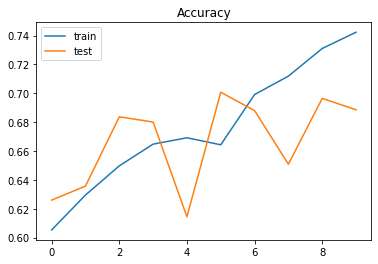

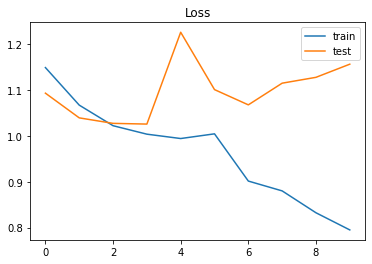

In [37]:
from fhnw.nlp.utils.ploting import plot_history

plot_history(history)

In [38]:
# Unfreeze all layers (i.e. make embeddings trainable)
model.trainable = True
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 300)         55854300  
_________________________________________________________________
conv_0 (Conv1D)              (None, None, 128)         268928    
_________________________________________________________________
max_pool_0 (MaxPooling1D)    (None, None, 128)         0         
_________________________________________________________________
conv_1 (Conv1D)              (None, None, 128)         114816    
_________________________________________________________________
global_max_pool_1 (GlobalMax (None, 128)               0         
_________________________________________________________________
global_max_pool_dropout (Dro (None, 128)               0       

In [42]:
from fhnw.nlp.utils.params import re_compile_model

params["batch_size"] = 32
re_compile_model(params, model)

In [43]:
params["training_epochs"] = 5
history = train_model(params, model, dataset_train, dataset_val)

Epoch 1/5
 20/103 [====>.........................] - ETA: 38s - loss: 0.6630 - accuracy: 0.7961

ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted:  OOM when allocating tensor with shape[64,4734,300] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator gpu_host_bfc
	 [[node cnn/embedding/embedding_lookup (defined at /usr/local/lib/python3.6/dist-packages/fhnw/nlp/utils/params.py:853) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[cnn/embedding/embedding_lookup/_38]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted:  OOM when allocating tensor with shape[64,4734,300] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator gpu_host_bfc
	 [[node cnn/embedding/embedding_lookup (defined at /usr/local/lib/python3.6/dist-packages/fhnw/nlp/utils/params.py:853) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_7894]

Errors may have originated from an input operation.
Input Source operations connected to node cnn/embedding/embedding_lookup:
 cnn/embedding/embedding_lookup/7517 (defined at /usr/lib/python3.6/contextlib.py:81)

Input Source operations connected to node cnn/embedding/embedding_lookup:
 cnn/embedding/embedding_lookup/7517 (defined at /usr/lib/python3.6/contextlib.py:81)

Function call stack:
train_function -> train_function
